逻辑回归又称logistic回归分析，是一种广义的线性回归分析模型，常用于数据挖掘，疾病自动诊断，经济预测等领域。逻辑回归从本质来说属于二分类问题。

二分类问题是指预测的y值只有两个取值（0或1），二分类问题可以扩展到多分类问题。例如：我们要做一个垃圾邮件过滤系统，x是邮件的特征，预测的y值就是邮件的类别，是垃圾邮件还是正常邮件。对于类别我们通常称为正类（positive class）和负类（negative class），垃圾邮件的例子中，正类就是正常邮件，负类就是垃圾邮件。

在二分类的问题中经常还会遇到不平衡类的分类问题，例如在异常值检测的应用中异常值的数量要远远小于正常值的数量、在信用卡欺诈检测的应用中涉嫌欺诈的信用卡用户数量要远远小于正常用户的数量、在用户流失预测的应用中等流失用户的数量要远远小于未流失的用户数量。在这些不平衡的二分类问题中我们所关注的重点或者说我们所需要预测的往往是那些占比教小的分类，比如

* 我们只需要能准确识别出哪些是异常值而不需要去关心正常值
* 我们只需要识别出哪些是涉嫌欺诈的信用卡用户而不用去关心正常的信用卡用户
* 我们只需要识别出哪些用将会流失而不用去关心正常用户。

在这些不平衡类的分类问题中，预测的准确率(accuracy)已经不是一个很好的评估指标，因为它会忽视小类(负类)的预测准确率，但是小类(负类)往往是我们关注的重点。此时我们应该借助于其他的评估指标如：查准率、查全率、F1等。

# 数据


我们的数据来自于葡萄牙银行机构的营销活动数据，该营销活动通过向用户打电话来推销银行的理财产品， 你可以在这里下载(http://archive.ics.uci.edu/ml/datasets/Bank+Marketing ),数据中包含了41188条银行客户信息和21个字段:

* 1 - age ：客户年龄(numeric)
* 2 - job : 工作类型 (分类型变量: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : 婚姻状态 (分类型变量: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education 文化程度(分类型变量: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: 是否有住房贷款 (分类型变量: 'no','yes','unknown')
* 7 - loan: 是否有个人贷款? (分类型变量:  'no','yes','unknown')

与打电话相关的变量:
* 8 - contact: 联系类型 (分类型变量:  'cellular','telephone')
* 9 - month: 最后一次联系的月份 (分类型变量:  'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: 最后一次联系所在的星期 (分类型变量:  'mon','tue','wed','thu','fri')
* 11 - duration: 最后一次联系的持续时间, 以秒为单位（数字）。 重要提示：此变量会严重影响输出目标变量（例如，如果持续时间= 0，则y ='否'）。 然而，在电话呼叫之前不知道持续时间。 此外，在通话结束后，显然已知y。 因此，此输入仅应包括在基准目的中，如果打算采用现实的预测模型，则应将其丢弃。

其他属性:
* 12 - campaign: 与用户电话联系的次数 (numeric, 包含最后一次联系)
* 13 - pdays: 最后一次联系与前一次联系之间间隔的天数 (numeric; 999 表示之前从未联系过该客户)
* 14 - previous: 在该次营销活动之前与客户联系的次数 (numeric)
* 15 - poutcome: 上一次营销活动的结果 (categorical: 'failure','nonexistent','success')

社会和经济背景属性
* 16 - emp.var.rate: 就业变化率 - 季度指标 (numeric)
* 17 - cons.price.idx: 消费者价格指数 - 月度指标 (numeric)
* 18 - cons.conf.idx: 消费信心指数 - 月度指标 (numeric)
* 19 - euribor3m: 欧洲银行同业拆借利率3个月-每日指标(numeric)
* 20 - nr.employed: 员工人数 - 季度指标 (numeric)

输出变量 (目标变量):
* 21 - y - 客户是否订购理财产品? (0:'no',1:'yes')





In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./data/banking.csv', header=0)
df = df.dropna()
print(df.shape)
print(list(df.columns))

df.head()

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


在文化程度(education)这列中包含了很多的类别，我们需要对其进行整理，我们要将其中的basic.4y,basic.6y,basic.9y这三个类别合并为basic

In [3]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [4]:
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])

In [5]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# 数据分析


y是我们的目标变量，当y为0时表示用户没有订购了银行的理财产品,当y为1表示用户订购了银行的理财产品。接下来我们要查看一下y的数据分布

In [6]:
print(df['y'].value_counts())
print(df['y'].value_counts()/len(df))

0    36548
1     4640
Name: y, dtype: int64
0    0.887346
1    0.112654
Name: y, dtype: float64


从上面的统计结果中我们看到没有订购理财产品的人数为36548,占比为88.73%，而订购理财产品的人数为4640,占比为11.2%，很明显这是一个不平衡的二分类，未订购人数远大于订购人数,但是我们需要关注的重点却是那些占比较小的未订购人数，我们的模型需要能准确预测出未订购的客户。下面我们队目标变量进行可视化。

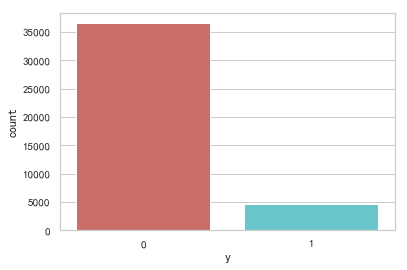

In [7]:
sns.countplot(x='y',data=df, palette='hls')
plt.show()

下面我们对目标变量进行更深入的探索：

In [8]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


从上面的结果中我们发现：
* 购买理财商品的用户平均年龄(age)要高于未购买的用户的平均年龄
* 购买理财商品的用户的最后一次联系的平均持续时间(duration)要明显高于未购买的用户的平均持续时间
* 购买理财商品的用户的平均pdays(自上次联系客户以来的日子)要小于未购买的用户的平均pdays, 这是合理的，因为pdays越小，最后一次通话的日子越近，用户对理财产品的记忆越强,因此销售的机会就越大。
* 令人奇怪的是购买理财商品的用户的平均campaign(与用户电话联系的次数)要是小于未购买的用户的平均campaign。

接下来我们查看一些分类型变量如:job(职业),marita(婚姻)，education(文化程度)：


In [9]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [10]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [11]:
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# 对分类型变量进行可视化

Text(0, 0.5, '数量')

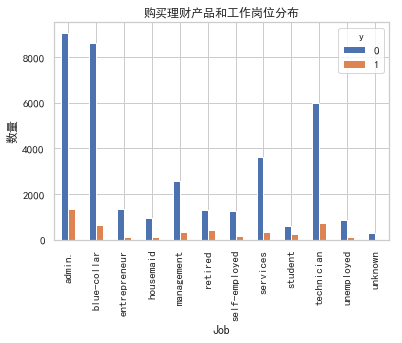

In [12]:
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('购买理财产品和工作岗位分布')
plt.xlabel('Job')
plt.ylabel('数量')

我们看到不同的职业购买理财产品的数量是不一样的，admin,blue-collar,technician等职业购买的数量较多

y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12


Text(0, 0.5, '客户比例')

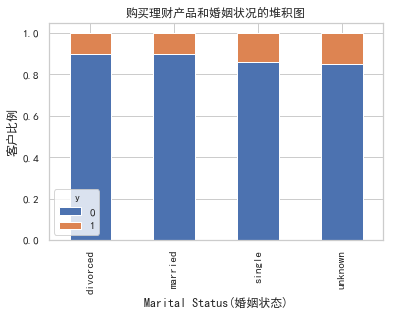

In [13]:
table=pd.crosstab(df.marital,df.y)
print(table)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('购买理财产品和婚姻状况的堆积图')
plt.xlabel('Marital Status(婚姻状态)')
plt.ylabel('客户比例')

婚姻状态似乎和是否购买理财产品没有太大的关联

y                        0     1
education                       
Basic                11424  1089
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251


Text(0, 0.5, '客户比例')

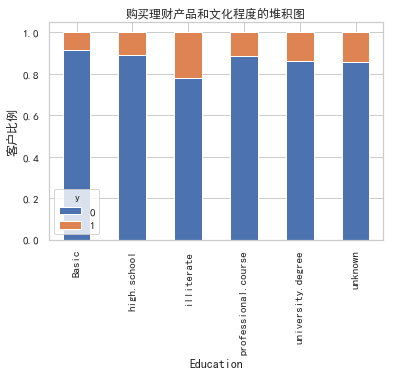

In [14]:
table=pd.crosstab(df.education,df.y)
print(table)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('购买理财产品和文化程度的堆积图')
plt.xlabel('Education')
plt.ylabel('客户比例')

文化程度中illiterate的购买比例较高,但是购买人数相对较少

y               0     1
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949


Text(0, 0.5, '数量')

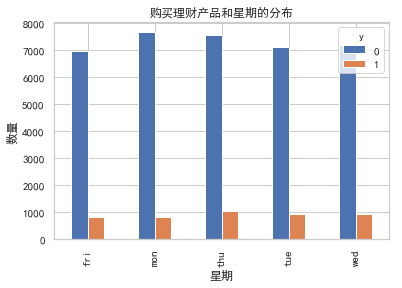

In [15]:
print(pd.crosstab(df.day_of_week,df.y))
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('购买理财产品和星期的分布') 
plt.xlabel('星期')
plt.ylabel('数量')

星期似乎和购买理财产品没有太大的关系

y          0    1
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256


Text(0, 0.5, '数量')

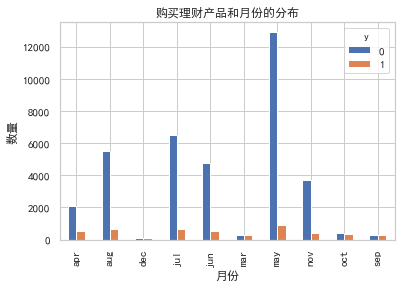

In [16]:
print(pd.crosstab(df.month,df.y))
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('购买理财产品和月份的分布')
plt.xlabel('月份')
plt.ylabel('数量')

月份似乎和购买理财产品有些关联

Text(0, 0.5, '频率')

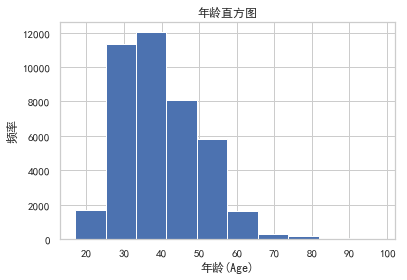

In [17]:
df.age.hist()
plt.title('年龄直方图')
plt.xlabel('年龄(Age)')
plt.ylabel('频率')

大部分接受电话访问的客户的年龄分布在30-40岁之间。

y                0     1
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894


Text(0, 0.5, '数量')

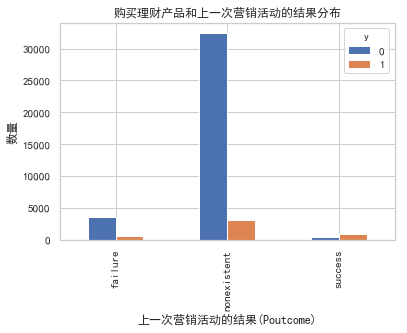

In [18]:
print(pd.crosstab(df.poutcome,df.y))
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('购买理财产品和上一次营销活动的结果分布')
plt.xlabel('上一次营销活动的结果(Poutcome)')
plt.ylabel('数量')

上一次营销活动的结果(Poutcome)似乎和是否购买理财产品有较强的相关性。

# 对分类型变量进行one-hot编码

下面我们要对数据集中的分类型变量进行one-hot编码，首先我们查看一下数据集中所有变量的信息：

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

我们看到所有的object变量就是我们需要转换的分类型变量

In [20]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df=df.join(cat_list)
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]
df_final=df[to_keep]
print(df_final.columns.values)
df_final.head()

['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed' 'y'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'marital_unknown'
 'education_Basic' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'default_no' 'default_unknown' 'default_yes'
 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no' 'loan_unknown'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed' 'poutcome_failure'
 'poutcome_nonexistent' 'poutcome_success']


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


# 利用SMOTE算法进行过采用


SMOTE（Synthetic Minority Oversampling Technique），合成少数类过采样技术．它是基于随机过采样算法的一种改进方案，由于随机过采样采取简单复制样本的策略来增加少数类样本，这样容易产生模型过拟合的问题，即使得模型学习到的信息过于特别(Specific)而不够泛化(General)，SMOTE算法的基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中。

对于不平衡类的问题，我们一般采样上采样(过采样)或下采样(负采样）策略是解决类别不平衡问题的基本方法之一。上采样即增加少数类样本的数量，下采样即减少多数类样本以获取相对平衡的数据集。大家还可以参考这篇博客(https://blog.csdn.net/nlpuser/article/details/81265614 )

想进一步了解SMOTE可以参考这篇论文(https://arxiv.org/pdf/1106.1813.pdf ),这里我们将使用python的imblearn库中的SMOTE算法(http://imbalanced-learn.org/en/stable/over_sampling.html#smote-variants )来实现过采样。



首先我们从数据集中分离出特征和标签，然后我们通过随机抽样创建训练集合测试集

In [21]:
X = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

接下来我们利用SMOTE算法对训练集进行过采样，采样的结果将使正样本合负样本的数量达到平衡。

算法流程如下。

(1)对于少数类中每一个样本x，以欧氏距离为标准计算它到少数类样本集中所有样本的距离，得到其k近邻。

(2)根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每一个少数类样本x，从其k近邻中随机选择若干个样本，假设选择的近邻为xn。

(3)对于每一个随机选出的近邻xn，分别与原样本按照如下的公式构建新的样本。

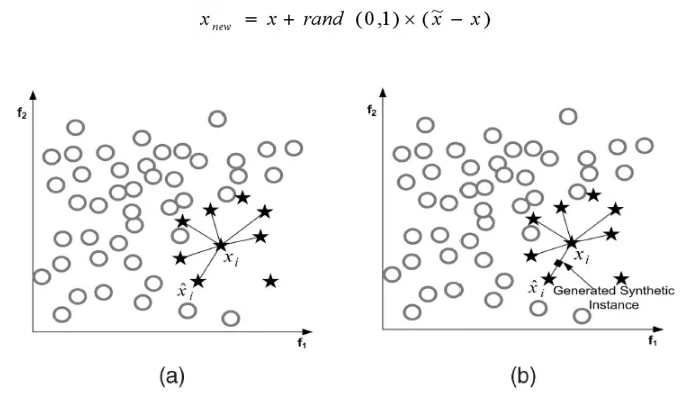


In [22]:
print('过采样之前训练集中正负样本的比例分布:')
print(y_train['y'].value_counts())
print(y_train['y'].value_counts()/len(y_train))
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
print('-------------------------------------------')
print('过采样之后训练集中正负样本的比例分布:')
print(os_data_y['y'].value_counts())
print(os_data_y['y'].value_counts()/len(os_data_y))

过采样之前训练集中正负样本的比例分布:
0    25567
1     3264
Name: y, dtype: int64
0    0.886789
1    0.113211
Name: y, dtype: float64
-------------------------------------------
过采样之后训练集中正负样本的比例分布:
1    25567
0    25567
Name: y, dtype: int64
1    0.5
0    0.5
Name: y, dtype: float64


经过SMOTE算法过采样以后，我们看法正样本合负样本的数量都已经一致了，正负样本的比例达到了平衡

# 特征筛选-递归特征消除

递归特征消除(Recursive Feature Elimination,RFE)(https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html ),此算法是用来进行特征选择,RFE基于重复构建模型并选择表现最好或最差特征,并将它们放在一边，然后对剩下的特征重复这样的过程,直到所有的特征都被用完。RFE的目标是通过递归地考虑越来越小的特征集来选择特征。

In [23]:
df_final_vars=df_final.columns.values.tolist()
y=['y']
X=[i for i in df_final_vars if i not in y]

In [24]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

rfe = RFE(logreg, 20)#选择20个特征
rfe = rfe.fit(os_data_X.values, os_data_y.values.ravel())

features = list(os_data_X.columns[rfe.support_])

print('原特征数量:',os_data_X.shape[1])
print()
print('经过模型筛选后的20个特征：')
print(features)
print()
print('特征排名:')
print(rfe.ranking_)

原特征数量: 61

经过模型筛选后的20个特征：
['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success']

特征排名:
[39 36 24 41  9 12 22 34  1 32  8  1  7  1  5 31  2  4 28  3  6 10 20 19
 15  1 14 17  1 16 18 21  1  1 42 25 38 35 30 37 33  1  1  1  1  1  1  1
  1  1  1  1 27 29 11 26 40 23  1 13  1]


## 逻辑回归

到目前为止我们有了平衡的二分类训练集,以及经过RFE筛选过的特征,接下来我们要用sklearn的逻辑回归模型来拟合我们的数据：

In [25]:
X=os_data_X[features]
y=os_data_y['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#在测试集上进行预测
y_pred = logreg.predict(X_test)
print('在测试集上预测的准确率: {:.2f}'.format(logreg.score(X_test, y_test)))

在测试集上预测的准确率: 0.74


## 混淆矩阵

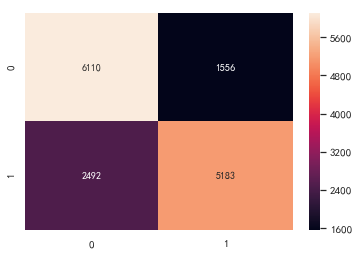

In [27]:
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')

# F1 分数

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.68      0.72      7675

    accuracy                           0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



# ROC曲线

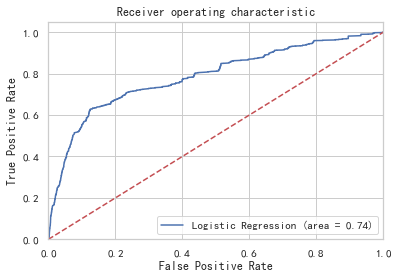

In [29]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

关于评估指标混淆矩阵、F1分数、ROC曲线在我之前多篇博客中都有说明，大家也可以参考这篇(https://blog.csdn.net/weixin_42608414/article/details/88344263)



# 总结

今天我们学习了在二分类问题中如何对数据进行分析，对于分类型变量我们可以使用堆积图和柱状图来进行分析，对于数值型变量我们可以用直方图来进行分析，对于分类型变量我们还需要进行one-hot编码。对于one-hot编码也有好多种方法，今天只使用了其中的一种，但今天使用的这种one-hot方法是有点缺陷的，缺陷在于它无法适应新数据，之所以适应它是因为它写起来比较方便，便于演示。今天我们还学习了两个重要的技术:SMOTE和RFE,前者是用来平衡二分类数据集的，它通过过采样的方法来增加较小分类的样本数量，从而使正负样本数量可以达到平衡，后者是通过递归特征消除的方法来从特征集中提炼有价值的特征。最后我们通过sklearn的逻辑回归模型来拟合训练集，并使用了混淆矩阵，F1分数，ROC曲线等评估指标来评估我们的模型，好了，今天就到这吧，祝大家中秋节快乐!